In [75]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns



In [76]:
df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14344\2511857008.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")


In [77]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [78]:
df.shape

(6500000, 18)

In [79]:
df.isna().sum()

VendorID                 79229
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          79229
trip_distance                0
RatecodeID               79229
store_and_fwd_flag       79229
PULocationID                 0
DOLocationID                 0
payment_type             79229
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [80]:
df.isna().sum().sum()

396145

In [81]:
df_cleaned = df.dropna()
df_cleaned.shape

(6420771, 18)

In [82]:
print(df.shape[0] - df_cleaned.shape[0])

79229


In [83]:
df_cleaned[df_cleaned["total_amount"] <= 0].shape

(21457, 18)

In [84]:
df_cleaned = df_cleaned[df_cleaned["total_amount"] > 0]

In [85]:
df_cleaned.shape

(6399314, 18)

In [86]:
df_cleaned.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [87]:
dfTest = df_cleaned[:50000]

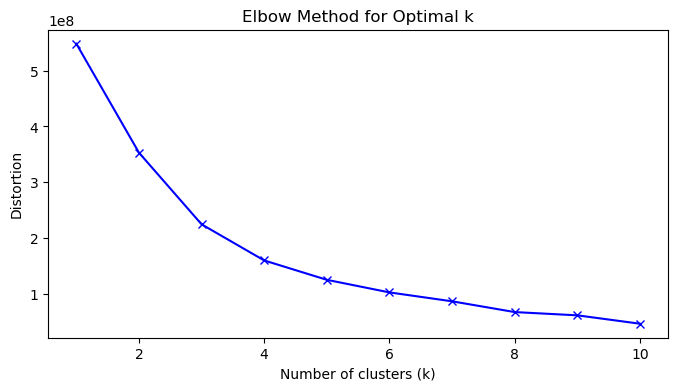

In [88]:
def plot_elbow_method(X, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Plot the elbow method to find the optimal number of clusters
plot_elbow_method(dfTest[["passenger_count", "trip_distance", "PULocationID", "DOLocationID", "total_amount"]])

In [89]:
#features = ['trip_distance', 'total_amount']
features = ["trip_distance", "total_amount"]
df_selected = dfTest[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=42) 
dfTest['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14344\235050297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['cluster'] = kmeans.fit_predict(df_scaled)


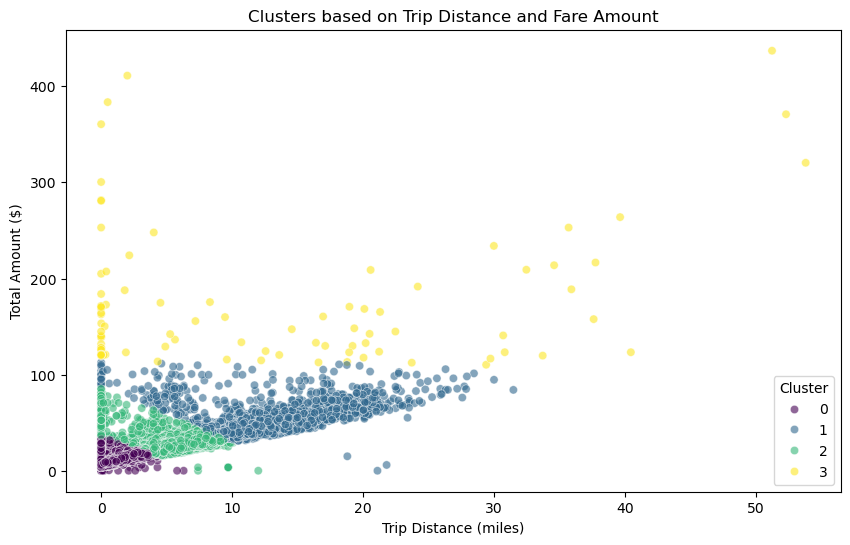

In [90]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfTest, x='trip_distance', y='total_amount', hue='cluster', palette='viridis', alpha=0.6)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.title('Clusters based on Trip Distance and Fare Amount')
plt.legend(title='Cluster')
plt.show()


In [91]:
dfTest[dfTest["trip_distance"] == dfTest["trip_distance"].max()].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,cluster
41789,1.0,01/01/2020 03:05:54 AM,01/01/2020 04:16:26 AM,1.0,53.8,5.0,N,132,265,1.0,250.0,0.0,0.0,53.35,16.62,0.3,320.27,0.0,3
